In [1]:



import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rc
rc("animation", html = "jshtml")
import matplotlib.animation as ani



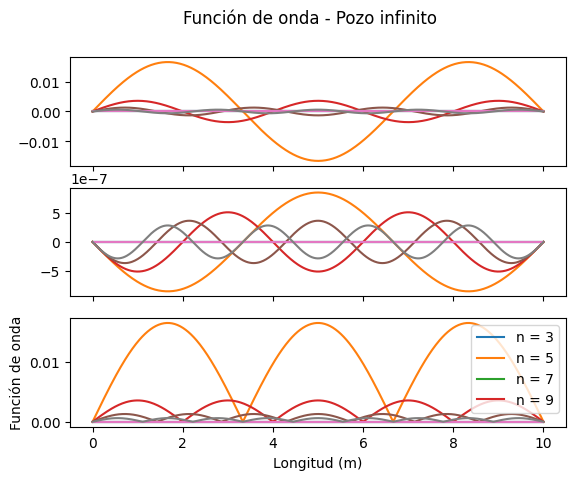

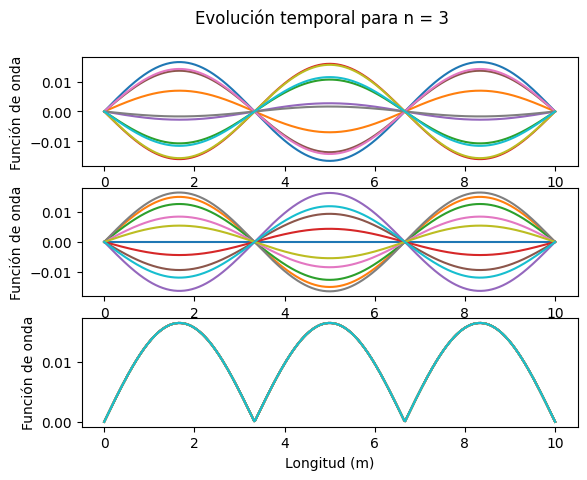

In [37]:

h = 6.626e-34
h_barra = h/(2*np.pi)

def k(n,a):
    return (n*np.pi)/a

def phi_x(n,a,x):
    c_n = (60**(1/2)/(np.pi**3*n**3)) * (2-(2*(-1)**n))

    return c_n *(2/a)**(1/2)*np.sin((n*np.pi/a)*x)

def phi_t (n,a,m,t): 
    E = (((n*np.pi)/a)**2*h_barra**2)/(2*m)

    return np.e **(-1j*(E/h_barra)*t)


def linearComb_phi_x(numN,a,m,x,t): 
    phi_total = 0 
    
    
    for n in range (1,numN):
        E = (((n*np.pi)/a)**2*h_barra**2)/(2*m)
        phi_total+=phi_x(n,a,x)*np.e **(-1j*(E/h_barra)*t)

        print(phi_total)
    return phi_total

time =np.linspace(0,3,200)
n = 1
a = 10
m = 9.1e-31
x_space = np.linspace(0,a,500)

def waveFunction(n,a,m,t):

    
    return phi_x(n,a,x_space)*phi_t(n,a,m,t)



"""
fig, ax = plt.subplots(3)
fig.figsize=(6, 4)


def update (i):
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    t = time[i]
    waveValue = waveFunction(n,a,m,t,x_space)

    real = np.real(waveValue)
    ima = np.imag(waveValue)

    ax[0].plot(x_space,real,color="b")
    ax[1].plot(x_space,color="r")
    ax[2].plot(x_space,np.abs(waveValue),color="g")
    
   """ 


#ani.FuncAnimation(fig,func=update,frames=len(time))

def printGraph(numN, a,m,t): 

   
    t = 1
    fig, ax = plt.subplots(3,sharex=True)
    fig.figsize=(6, 4)
    #Different n 
    complete = 0 
    legends = []
    plt.suptitle("Función de onda - Pozo infinito")
    for n_d in range (2,numN): 

        waveValue = waveFunction(n_d,a,m,t)
        complete+=waveValue
        if n_d%2 ==1: 
            legends.append("n = "+str(n_d))

        
        ax[0].plot(x_space,waveValue.real)
        ax[1].plot(x_space,waveValue.imag)
        ax[2].plot(x_space,abs(waveValue))


    ax[2].set(xlabel="Longitud (m)", ylabel='Función de onda')
    
    


    plt.legend(legends, loc ="upper right")

    plt.show()
  





    #Different t
    
    n =3
    fig, bx = plt.subplots(3)
    legends = []
    plt.suptitle("Evolución temporal para n = 3")
    for t in range (0,1000000,100000): 

        waveValue = waveFunction(n,a,m,t)
        legends.append(str(t))
        
        bx[0].plot(x_space,waveValue.real)
        bx[1].plot(x_space,waveValue.imag)
        bx[2].plot(x_space,abs(waveValue))

    bx[2].set(xlabel="Longitud (m)", ylabel='Función de onda')
    
    for b in bx.flat:
         b.set( ylabel='Función de onda')
    
    #plt.legend(legends, loc ="upper right")

    plt.xlabel("Longitud (m)")

    plt.show()




printGraph(10,10,9.1e-31,time[0])



